In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import keras as K

In [3]:
import splitfolders

# Diviser le dossier 'Images' avec un ratio de 90% pour l'entraînement (incluant la validation) et 10% pour les tests
splitfolders.ratio("images", output="data_split", seed=42, ratio=(.9, .1), group_prefix=None) 


In [4]:
import os
import PIL

path_to_image ='images'
for subdir,_, files in os.walk(path_to_image):
    for file in files :
        filepath= os.path.join(subdir, file)
        try:
            with PIL.Image.open(filepath) as img:
                img.verify()
        except(IOError, SyntaxError,PIL.UnidentifiedImageError):
            print(f"Suppresion de {filepath}")
            os.remove(filepath)
                

Found 14816 images belonging to 120 classes.
Found 3654 images belonging to 120 classes.
Chargement du batch d'images: ['n02085620-Chihuahua\\n02085620_3409.jpg', 'n02085620-Chihuahua\\n02085620_3423.jpg', 'n02085620-Chihuahua\\n02085620_3485.jpg', 'n02085620-Chihuahua\\n02085620_3488.jpg', 'n02085620-Chihuahua\\n02085620_3593.jpg', 'n02085620-Chihuahua\\n02085620_3651.jpg', 'n02085620-Chihuahua\\n02085620_3677.jpg', 'n02085620-Chihuahua\\n02085620_368.jpg', 'n02085620-Chihuahua\\n02085620_3681.jpg', 'n02085620-Chihuahua\\n02085620_3742.jpg', 'n02085620-Chihuahua\\n02085620_3763.jpg', 'n02085620-Chihuahua\\n02085620_382.jpg', 'n02085620-Chihuahua\\n02085620_3826.jpg', 'n02085620-Chihuahua\\n02085620_3838.jpg', 'n02085620-Chihuahua\\n02085620_3875.jpg', 'n02085620-Chihuahua\\n02085620_3877.jpg', 'n02085620-Chihuahua\\n02085620_3880.jpg', 'n02085620-Chihuahua\\n02085620_3928.jpg', 'n02085620-Chihuahua\\n02085620_3942.jpg', 'n02085620-Chihuahua\\n02085620_3975.jpg', 'n02085620-Chihuahua\\

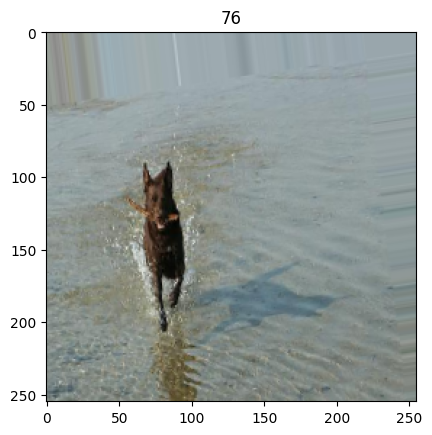

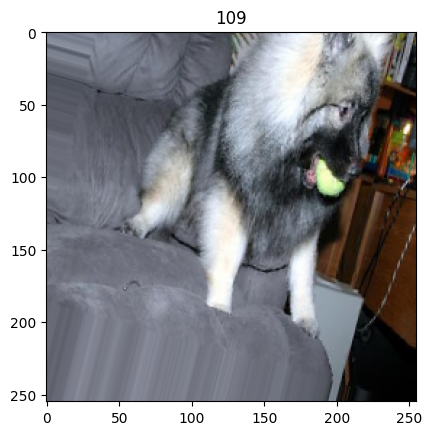

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras import optimizers
from keras import backend as K

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Réserver 20% des données pour la validation

# Créer le générateur pour l'entraînement
train_generator = train_datagen.flow_from_directory(
    "data_split/train",
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Utiliser la partie 'training' du dataset

# Créer le générateur pour la validation
validation_generator = train_datagen.flow_from_directory(
    "data_split/train",
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    subset='validation') 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Votre code existant pour créer train_datagen, etc.

# Fonction pour envelopper votre générateur et ajouter un logging
def generator_with_logging(generator):
    for batch_x, batch_y in generator:
        # Log l'index du batch actuel et le ou les noms de fichiers correspondants
        file_index = generator.batch_index * generator.batch_size
        # Assurez-vous de ne pas dépasser le nombre de fichiers
        file_index = file_index % len(generator.filenames)
        batch_files = generator.filenames[file_index:file_index + generator.batch_size]
        print(f"Chargement du batch d'images: {batch_files}")
        yield batch_x, batch_y

# Créer le générateur pour l'entraînement avec logging
train_generator_with_logging = generator_with_logging(train_generator)

# Créer le générateur pour la validation avec logging
validation_generator_with_logging = generator_with_logging(validation_generator)

# Visualisation de deux images du générateur avec logging
try:
    x, y = next(train_generator_with_logging)  # Utilisez le générateur avec logging

    for i in range(0, 2):
        image = x[i]
        plt.imshow(image)
        plt.title(y[i].argmax())
        plt.show()
except Exception as e:
    print(f"Une erreur est survenue: {e}")


Epoch 1/200
463/463 [==============================] - ETA: 0s - loss: 1.7631 - accuracy: 0.5850
Epoch 1: val_loss improved from inf to 0.74319, saving model to test.h5


C:\Users\Damie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


463/463 [==============================] - 3309s 7s/step - loss: 1.7631 - accuracy: 0.5850 - val_loss: 0.7432 - val_accuracy: 0.7748 - lr: 1.0000e-04
Epoch 2/200
463/463 [==============================] - ETA: 0s - loss: 0.6475 - accuracy: 0.8040
Epoch 2: val_loss improved from 0.74319 to 0.70078, saving model to test.h5
463/463 [==============================] - 3292s 7s/step - loss: 0.6475 - accuracy: 0.8040 - val_loss: 0.7008 - val_accuracy: 0.7871 - lr: 1.0000e-04
Epoch 3/200
463/463 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.8569
Epoch 3: val_loss improved from 0.70078 to 0.69828, saving model to test.h5
463/463 [==============================] - 3287s 7s/step - loss: 0.4692 - accuracy: 0.8569 - val_loss: 0.6983 - val_accuracy: 0.7964 - lr: 1.0000e-04
Epoch 4/200
463/463 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8801
Epoch 4: val_loss did not improve from 0.69828
463/463 [==============================] - 3288s 7s/step - l

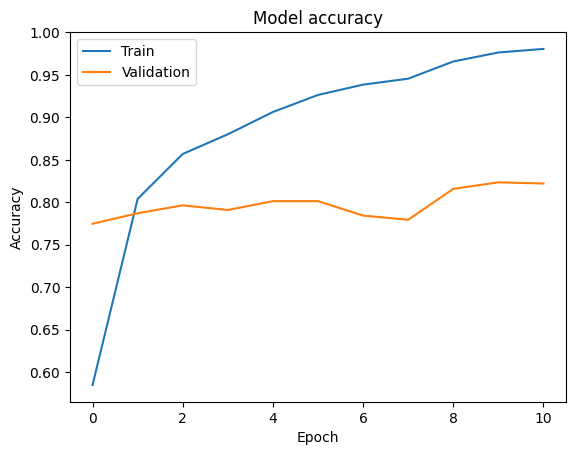

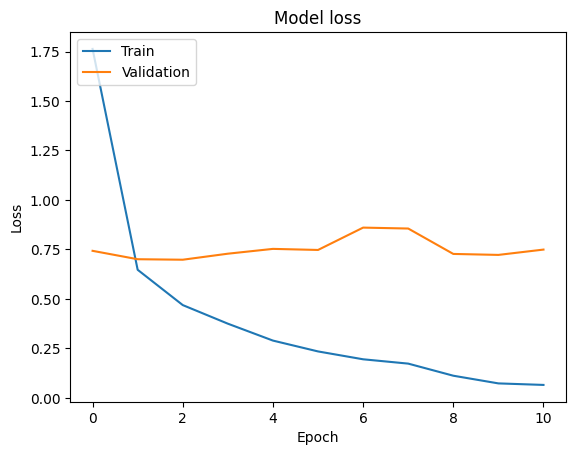

In [2]:
from keras.applications import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import matplotlib.pyplot as plt


# Charger le modèle Xception pré-entraîné
base_model = Xception(weights='imagenet', include_top=False)

# Ajouter des couches personnalisées
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Ajouter Global Average Pooling pour réduire la dimensionnalité
x = Dense(1024, activation='relu')(x)  # Ajouter une couche Dense pour l'apprentissage des caractéristiques
x = Dropout(0.3)(x)  # Ajouter une couche de dropout pour réduire le surapprentissage
x = Dense(1024, activation='relu')(x)  # Ajouter une couche Dense pour l'apprentissage des caractéristiques
predictions = Dense(120, activation='softmax')(x)  # Couche de sortie pour 120 classes

# Configurer les callbacks
checkpoint = ModelCheckpoint("test.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)


# Définir le learning rate
learning_rate = 0.0001  

# Créer l'instance de l'optimiseur avec le learning rate spécifié
optimizer = Adam(learning_rate=learning_rate)

# Compiler le modèle avec l'optimiseur configuré
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[checkpoint, early, lr_scheduler])

# Tracer la précision et la perte
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Sauvegarder le modèle
model.save('test_final.h5')


In [5]:
# Test le model sur le dossier de test
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

## Charger le modèle
model = load_model('test.h5')  

# Créer le générateur pour les tests
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "data_split/val",  
    target_size=(255, 255), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False) 


test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

# Évaluer le modèle
scores = model.evaluate(test_generator, steps=test_steps_per_epoch)
print("Accuracy sur le test set: ", scores[1])

# Prédire les classes
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_class_indices = np.argmax(predictions, axis=1)

# Afficher les classes prédictes
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions_labels = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
results = pd.DataFrame({"Filename": filenames, "Predictions": predictions_labels})


Found 2110 images belonging to 120 classes.


C:\Users\Damie\AppData\Local\Temp\ipykernel_2152\578305384.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


66/66 [==============================] - 96s 1s/step - loss: 0.6480 - accuracy: 0.8156
Accuracy sur le test set:  0.8156397938728333
66/66 [==============================] - 96s 1s/step


In [6]:
print(results.head(10))

                                  Filename            Predictions
0  n02085620-Chihuahua\n02085620_11238.jpg    n02085620-Chihuahua
1  n02085620-Chihuahua\n02085620_11258.jpg    n02085620-Chihuahua
2  n02085620-Chihuahua\n02085620_11337.jpg    n02085620-Chihuahua
3   n02085620-Chihuahua\n02085620_1321.jpg    n02085620-Chihuahua
4  n02085620-Chihuahua\n02085620_13383.jpg    n02085620-Chihuahua
5  n02085620-Chihuahua\n02085620_14252.jpg    n02085620-Chihuahua
6  n02085620-Chihuahua\n02085620_14516.jpg       n02105412-kelpie
7   n02085620-Chihuahua\n02085620_1620.jpg  n02087046-toy_terrier
8   n02085620-Chihuahua\n02085620_2793.jpg    n02085620-Chihuahua
9   n02085620-Chihuahua\n02085620_2887.jpg    n02085620-Chihuahua
